# Tutorial 3 - Tutorial for generating several different isotherms for silicalite by changing a forcefield paramter in the FIELD file
## Author - Rhiannon Heath 

### Prerequisites

This tutorial follows on from tutorial 2 on generating an isotherm for silicalite. It is a good idea to follow them in order as the tasks increase in difficulty. 

In this tutorial you will be running code to generate from an original FIELD file, several modified FIELD files and running high throughput calculations, where the simulations run one after the other without any user input, to generate four different sets of data to produce four different isotherms. These four isotherms should be signifciantly different as in each simulation the O_C parameter in the FIELD file has been changed by a value of 10%. This tutorial hence demonstartes not only the power of high throuhput calculations, but also the way in which the forcefield has such an impact on the data produced.

### Code for 'multiple sweeps'

Below is code to start the high throughput calculations. You need to have the correct CONFIG and CONTROL file in order to be able to do this, they have been provided for you. You will also need the correct FIELD file, this is named 'MASTERFIELD' and again has been provided for you. It is important you start with the 'MASTERFIELD' file otherwise the code will not work. The code works by going into the MASTERFIELD file, finding the parameter you want to change and then multiplying it by a percentage in order to change that parameter by however much you want to change it. It will run for as many percentages as you want to change and however many chemical potentials you want to run it for.  

The example code below multiplies the O_C parameter by 80, 90, 110 and 120 percent, so the parameter will have been increased and decreased by both 10 and 20 percent. The example code runs simulations for the chemical potential 0.0001, 0.0002, 0.0003, and 0.0004 therefore once this code has run, you should obtain data for 4 chemical potentials at iteration 80, 90, 110 and 120 percent - the folders containing the output files will be named "iteration80", "iteration90" etc, so it is obvious which data set you are looking at. 

**WARNING** The simulations will take a while to run, so do not panic if it seems like it has been running for a long time

In [ ]:
fieldFilename = "MASTER_FIELD"
replaceKey="O_C core O_C core" # Item to search for in field file
replaceItem=6 # number of the item along the line to replace

variationPercent =[80, 90, 110, 120] # variation to sweep over in percent

import logging

import dlmontepython.simtask.dlmonteinterface as interface
import dlmontepython.simtask.measurement as measurement
import dlmontepython.simtask.analysis as analysis
import dlmontepython.simtask.task as task

handler = logging.StreamHandler()

measurement.logger.setLevel(logging.INFO)
measurement.logger.addHandler(handler)

interface = interface.DLMonteInterface("/Users/Rhiannon/bin/DLMONTE-SRL.X")

energy_obs = task.Observable( ("energy",) )
nmol_obs = task.Observable( ("nmol",1) )
observables = [energy_obs, nmol_obs]

precisions = { nmol_obs : 5 }

measurement_template = measurement.Measurement(interface, observables, maxsims=20, maxtime=90 )

# Set up the chemical potentials/thermodynamic activities to consider

chempots = [0.095, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

replaceItem = replaceItem - 1 #subtract 1 as counting starts from 0

# open and read the master field file
inputFile = open(fieldFilename, "r")
contents=inputFile.readlines()
inputFile.close()

found = False

#find which line the search string is on
for line in range(len(contents)):
    if replaceKey in contents[line]:
        print ("Found Line:", contents[line])
        lineToChange = line
        found = True
        splitLine = contents[line].split(' ')
        value = float(splitLine[replaceItem])

if found:
    print ("Value to vary:", value, "\n")
    print ("Iterating:")
    for percent in variationPercent:
        iterationValue = value * percent/100
        splitLine[replaceItem] = str(iterationValue)
        newLine = ' '.join(splitLine)
        print ("   ", percent,"% ", newLine)
        contents[lineToChange] = newLine

        newFieldFile = open('FIELD', 'w')
        newFieldFile.writelines(contents)
        newFieldFile.close()

        sweep = measurement.MeasurementSweep(param="molchempot", paramvalues=chempots,
                                             measurement_template=measurement_template, outputdir="iteration" + str(percent))
        sweep.run()
else:
    print ("Error: could not find '",replaceKey, "' in file ", fieldFilename, sep='')


**NOTE**: All options can be changed in this code, therefore you can change the forcefield paramter you want to change, you can change the percentage by which the parameter is multiplied, you can change the chemical potentials you want to probe. Why don't you try multiplying the paramter by 200%! - or any other number you want to, or why dont you probe a different parameter in the forcefield file? Or look at a different range of chemical potentials?

The example isotherms have been shown below for your reference 

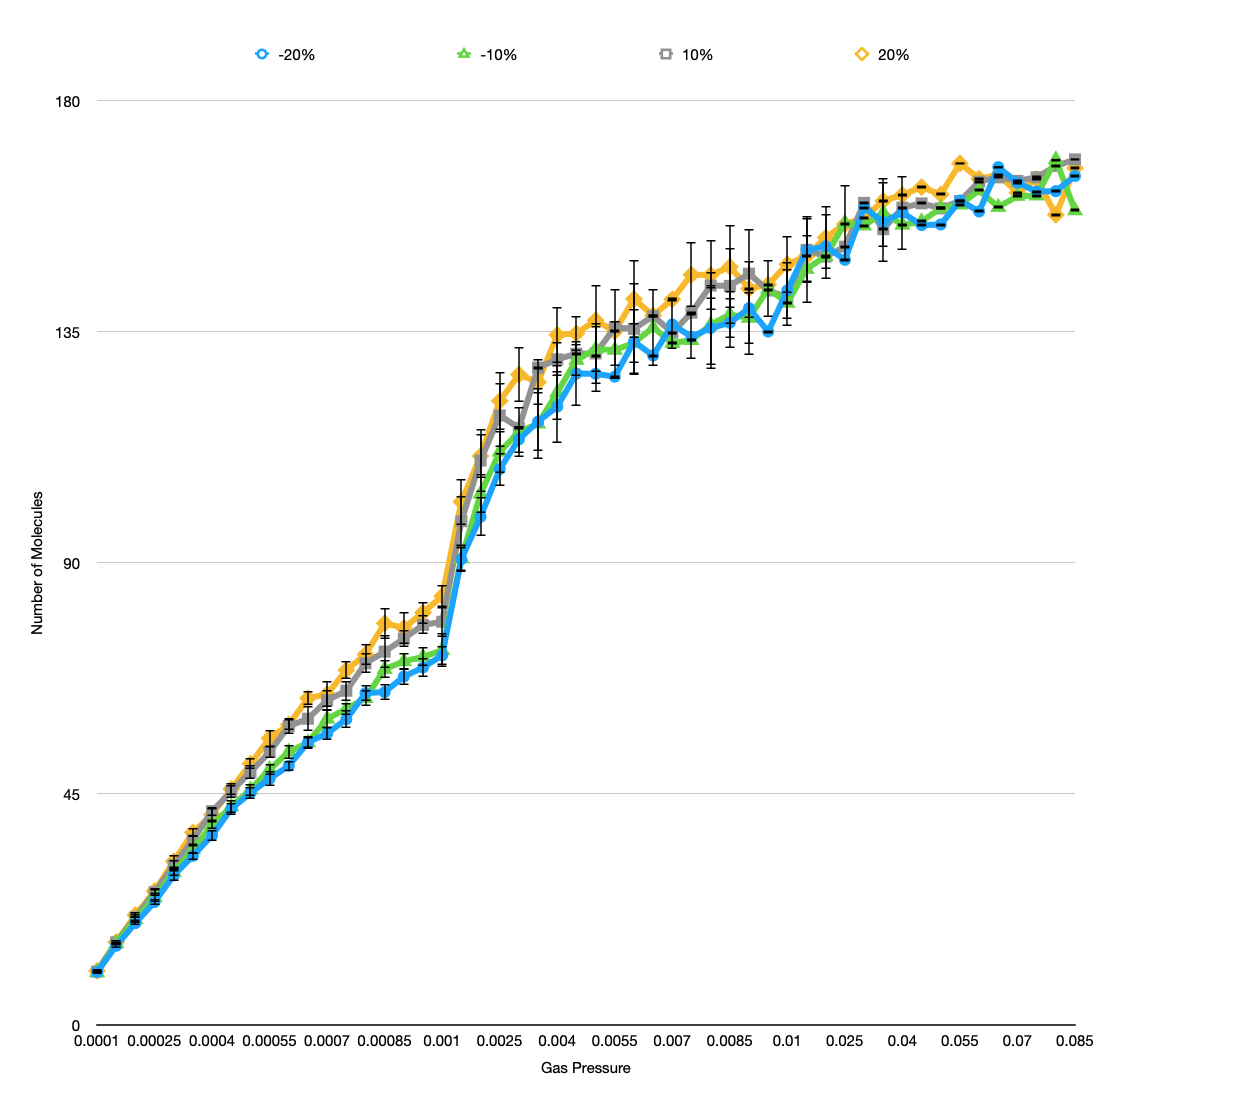